# INFOB2DA | Practical Assignment 2
## *Clustering methods and distance functions*

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')

In [4]:
data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Task 1: Get dataset on screen

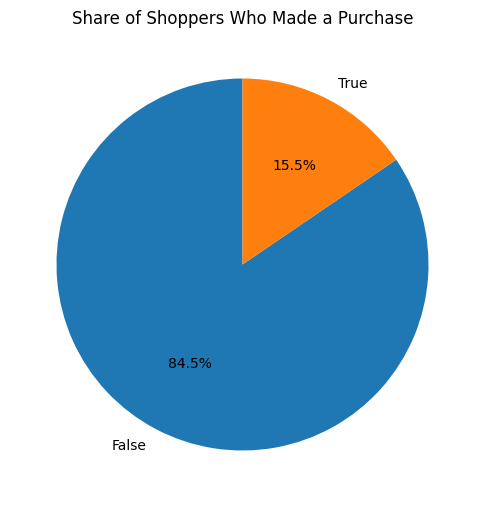

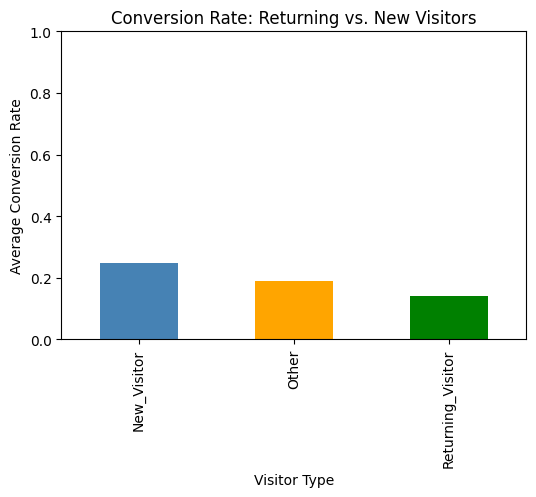

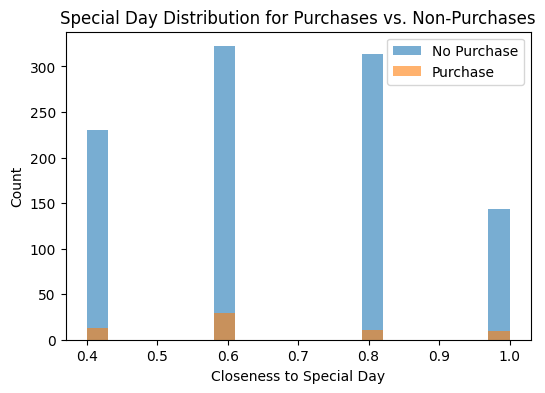

In [7]:
import matplotlib.pyplot as plt
revenue_counts = data["Revenue"].value_counts()

# Pie chart of Revenue distribution

plt.figure(figsize=(6,8))
plt.pie(revenue_counts, labels=revenue_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Share of Shoppers Who Made a Purchase")
plt.show()

# Conversion rate (mean of Revenue per visitor type)
visitor_revenue = data.groupby("VisitorType")["Revenue"].mean()

plt.figure(figsize=(6,4))
visitor_revenue.plot(kind="bar", color=["steelblue", "orange", "green"])
plt.title("Conversion Rate: Returning vs. New Visitors")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Visitor Type")
plt.ylim(0, 1)
plt.show()

# Separate special day values for buyers vs. non-buyers

plt.figure(figsize=(6,4))
plt.hist(data[(data["Revenue"] == False) & (data["SpecialDay"] > 0.2)]["SpecialDay"], bins=20, alpha=0.6, label="No Purchase")
plt.hist(data[(data["Revenue"] == True) & (data["SpecialDay"] > 0.2)]["SpecialDay"], bins=20, alpha=0.6, label="Purchase")
plt.title("Special Day Distribution for Purchases vs. Non-Purchases")
plt.xlabel("Closeness to Special Day")
plt.ylabel("Count")
plt.legend()
plt.show()


# One-minute story about the dataset
These charts reveal a sobering e-commerce reality. Only 15% of website visitors actually make a purchase, an 85% abandonment rate representing thousands of lost opportunities daily. <br>
Even more surprising, returning visitors convert at just 13% compared to 20% for new customers, suggesting loyalty programs aren't translating to sales. <br>
Meanwhile, special shopping events like Valentine's Day show decreased purchase activity as they approach, indicating customers may be waiting for better deals or comparison shopping. <br> 
The story is clear: businesses have massive untapped potential with most visitors leaving empty-handed, loyal customers becoming more selective, and special occasions failing to drive expected sales spikes. <br>
The challenge isn't attracting traffic, it's converting browsers into buyers.

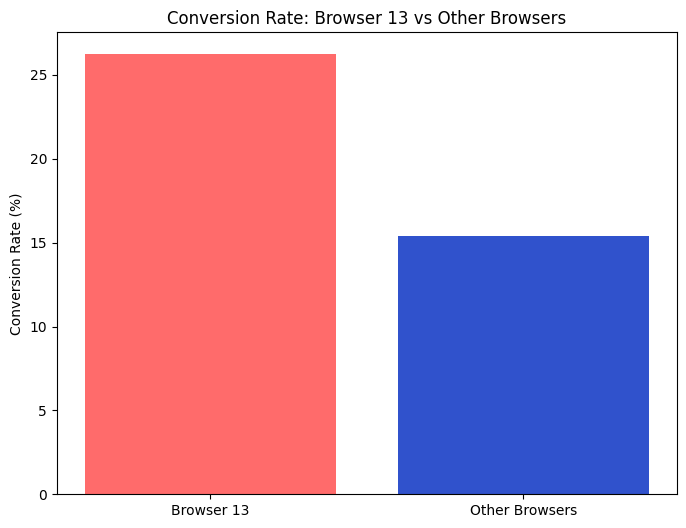

In [8]:
data_copy = data.copy()
data_copy['Browser_Group'] = data_copy['Browser'].apply(lambda x: 'Browser 13' if x == 13 else 'Other Browsers')
conversion_rates = data_copy.groupby('Browser_Group')['Revenue'].mean() * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(conversion_rates.index, conversion_rates.values, 
               color=['#FF6B6B', '#3052CC'])

plt.title('Conversion Rate: Browser 13 vs Other Browsers')
plt.ylabel('Conversion Rate (%)')

plt.show()

# Preprocessing

In [9]:
# (n_samples, n_features)
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

# Split features and target
X = data.drop(columns='Revenue')
y = data['Revenue']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']])
X_scaled

# One-hot encode categorical features
X_encoded = pd.get_dummies(X.drop(columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']), drop_first=True)

# Combine scaled numerical features and encoded categorical features
X_final = np.hstack((X_scaled, X_encoded.values))

# PCA for dimensionality reduction
# pca = PCA(n_components=10)
# X_final = pca.fit_transform(X_final)

# Clustering algorithms

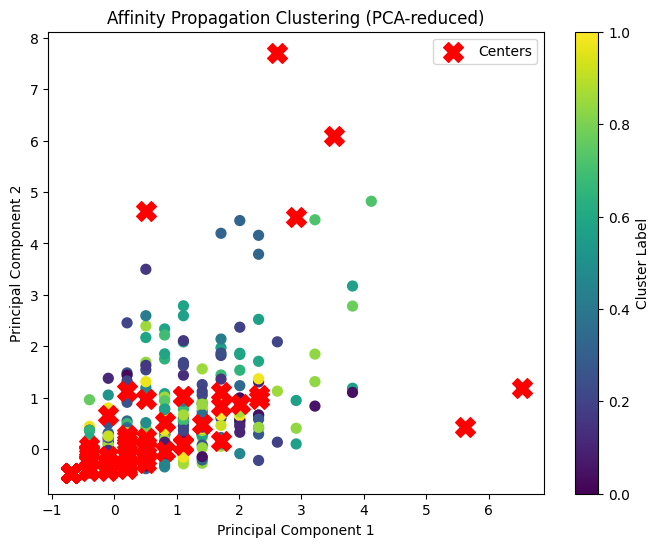

Estimated number of clusters: 97


In [12]:
# Apply Sklearn's Affinity Propagation clustering.
from sklearn.cluster import AffinityPropagation
# Step 2: Fit AffinityPropagation
affinity_propagation = AffinityPropagation(
    damping=0.9,
    preference=-30,
    random_state=8
)

subset_idx = np.random.choice(X_final.shape[0], size=1000, replace=False)
X_subset = X_final[subset_idx]

clusters = affinity_propagation.fit_predict(X_subset)

# Step 3: Visualize in 2D (using first 2 PCA components for plotting)
X_2d = X_subset[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Affinity Propagation Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# highlight cluster centers
centers_2d = affinity_propagation.cluster_centers_[:, :2]
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], 
            c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()

print("Estimated number of clusters:", len(set(clusters)))

# Evaluation of clustering methods

In [ ]:
import math

def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two points."""
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def silhouette_score(X, labels):
    n = len(X)
    scores = []
    
    for i in range(n):
        own_cluster = labels[i]
        same_cluster_points = [X[j] for j in range(n) if labels[j] == own_cluster and j != i]
        
        # If your cluster contains only this sample -> silhouette = 0
        if not same_cluster_points:
            scores.append(0.0)
            continue

        # Compute a(i): average intra-cluster distance
        a_i = sum(euclidean_distance(X[i], X[j]) for j in same_cluster_points) / len(same_cluster_points)
            
        # Compute b(i): min average distance to points in other clusters
        other_clusters = set(labels) - {own_cluster}
        b_i = math.inf
        
        for c in other_clusters:
            other_cluster_points = [X[j] for j in range(n) if labels[j] == c]
            if other_cluster_points:
                avg_dist  = sum(euclidean_distance(X[i], p) for p in other_cluster_points) / len(other_cluster_points)
                b_i = min(b_i, avg_dist)
        
        # Compute silhouette score for point i
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0
        scores.append(s_i)
    
    return sum(scores) / n

from sklearn.metrics import silhouette_score as sk_silhouette_score

print("Average silhouette score:", silhouette_score(X_subset, clusters))

print("Average silhouette score:", sk_silhouette_score(X_subset, clusters))


Average silhouette score: 0.11465003712257912
Average silhouette score: 0.11465003712257908


# Distance Functions

In [19]:
def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two points."""
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))
